Available columns: ['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'PollutionExposure', 'PollenExposure', 'DustExposure', 'PetAllergy', 'FamilyHistoryAsthma', 'HistoryOfAllergies', 'Eczema', 'HayFever', 'GastroesophagealReflux', 'LungFunctionFEV1', 'LungFunctionFVC', 'Wheezing', 'ShortnessOfBreath', 'ChestTightness', 'Coughing', 'NighttimeSymptoms', 'ExerciseInduced', 'Diagnosis', 'DoctorInCharge']
Accuracy: 0.6847599164926931
Confusion Matrix:
 [[327   8]
 [143   1]]

Classification Report:
               precision    recall  f1-score   support

   No Asthma       0.70      0.98      0.81       335
      Asthma       0.11      0.01      0.01       144

    accuracy                           0.68       479
   macro avg       0.40      0.49      0.41       479
weighted avg       0.52      0.68      0.57       479



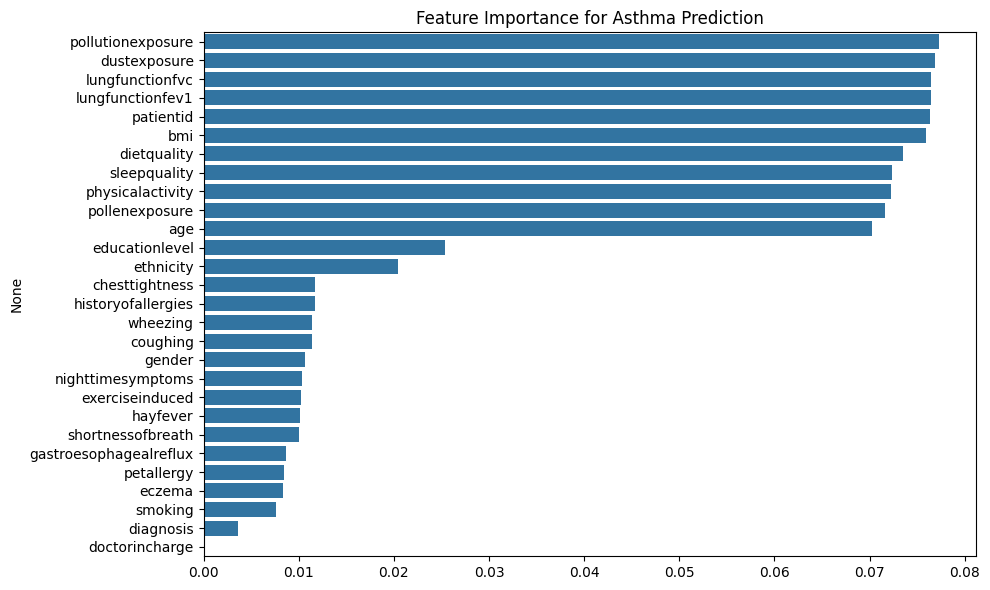

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv(r"C:\Users\santo\Downloads\asthma\asthma_disease_data.csv")

# Clean column names
df.columns = df.columns.str.strip()

# Print column names to identify the correct target
print("Available columns:", df.columns.tolist())

# Optional: lowercase all column names for consistency
df.columns = df.columns.str.lower()

# Try to identify the target column
target_col = None
for col in df.columns:
    if 'asthma' in col.lower():
        target_col = col
        break

if target_col is None:
    raise ValueError("No column related to 'asthma' found. Please check your dataset.")

# Drop missing values
df.dropna(inplace=True)

# Encode categorical features
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Define features and target
X = df.drop(columns=[target_col])
y = df[target_col]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["No Asthma", "Asthma"]))

# Feature importance
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Feature Importance for Asthma Prediction")
plt.tight_layout()
plt.show()